## Multiclass Classification: Kaggel Otto Dataset
https://www.kaggle.com/c/otto-group-product-classification-challenge

** Dataset Information: **

Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.


** Attribute Information: (93 features and 1 class)**

- id - an anonymous id unique to a product
- feat_1, feat_2, ..., feat_93 - the various features of a product
- target - the class of a product 

** Objective of this project **

build a predictive model which is able to distinguish between our main product categories (class 1-9)

## Data

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [3]:
# Load Data
df = pd.read_csv('train.csv',index_col='id')

In [4]:
# Inspect Data
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [12]:
df.tail()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9
61877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [13]:
df.shape

(61878, 94)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61878 entries, 1 to 61878
Data columns (total 94 columns):
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null int64
feat_28    61878 non-null i

In [8]:
df.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [8]:
df['target'].value_counts() #imbalanced target -->stratify

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [ ]:
df.isnull().any()

## Data preprocessing

** Split Features & Class (or target) **

In [9]:
X = df.drop('target', axis=1).values
y = df['target'].values
print(X.shape,y.shape)

(61878, 93) (61878,)


** Split Train Test Sets **

In [10]:
seed = 7 #random seed for reproducibility
np.random.seed(seed)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49502, 93) (12376, 93) (49502,) (12376,)


In [12]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
        'Class_7', 'Class_8', 'Class_9'], dtype=object),
 array([ 1543, 12898,  6403,  2153,  2191, 11308,  2271,  6771,  3964], dtype=int64))

** Scale features **

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Dundee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Baseline Models

In [14]:
# Import libraries
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [17]:
models = []
#linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#ensemble
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed)))

Accuracy: mean +/- std
LR: 75.4% +/- 0.1%


C:\Users\Dundee\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Dundee\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 70.1% +/- 0.2%
KNN: 76.1% +/- 0.4%
NB: 61.2% +/- 0.3%
DT: 70.2% +/- 0.4%
SVM: 77.5% +/- 0.1%
RF: 79.8% +/- 0.3%
XGB: 76.8% +/- 0.1%


Text(0,0.5,'Accuracy')

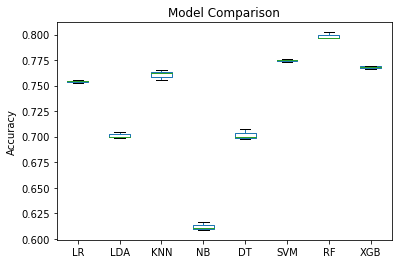

In [18]:
# cross validation
kfold = StratifiedKFold(n_splits=3, random_state=seed)
scoring = 'accuracy' 
names = []
results = []
print('Accuracy: mean +/- std')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print('{}: {:0.1f}% +/- {:0.1f}%'.format(name, cv_results.mean()*100, 
                                             cv_results.std()*100))
    
# model comparison
df_scores = pd.DataFrame(data = np.transpose(results),columns=names)
df_scores.plot(kind='box')
plt.title('Model Comparison')
plt.ylabel('Accuracy')

#### Secteted 2 top models: RF,SVM

## Parameter Tuning
try to improve top 2 algorithms: RF,SVM

#### Model 1: RandomForest

In [25]:
# Default
model = RandomForestClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 81.2%


In [27]:
# Grid Search
model = RandomForestClassifier(random_state=seed)

# parameters
n_estimators = [50,100,200]
param_grid = dict(n_estimators=n_estimators)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=3, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.7min finished


0.795362 (0.002899) with: {'n_estimators': 50}
0.798311 (0.002764) with: {'n_estimators': 100}
0.801725 (0.003564) with: {'n_estimators': 200}


Best accuracy of training set: 80.2% using {'n_estimators': 200}
Accuracy of test set: 81.1%


In [ ]:
# Feature Importance
model = RandomForestClassifier(n_estimators=200,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('target',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances',
                                                         figsize=(30,10))

#### Model 2: Support Vector Machine

In [26]:
# Default
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Accuracy of test set: 78.7%


In [ ]:
# Grid Search
model = SVC(kernel='rbf')

# parameters
C = [10,1,0.1,0.01]
param_grid = dict(C=C)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=3, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

## Final Model: RandomForest (n_estimators=200)

** Final Model **

In [19]:
model = RandomForestClassifier(n_estimators=200,random_state=seed)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 100.0%


** Save and load the final model **

In [20]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [21]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 100.0%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

    Class_1       1.00      1.00      1.00      1543
    Class_2       1.00      1.00      1.00     12898
    Class_3       1.00      1.00      1.00      6403
    Class_4       1.00      1.00      1.00      2153
    Class_5       1.00      1.00      1.00      2191
    Class_6       1.00      1.00      1.00     11308
    Class_7       1.00      1.00      1.00      2271
    Class_8       1.00      1.00      1.00      6771
    Class_9       1.00      1.00      1.00      3964

avg / total       1.00      1.00      1.00     49502



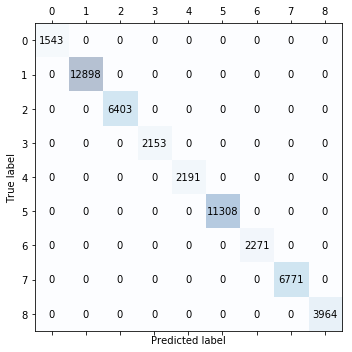

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(y_train, model.predict(X_train)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [23]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of test set: 81.1%


             precision    recall  f1-score   support

    Class_1       0.85      0.44      0.58       386
    Class_2       0.71      0.90      0.79      3224
    Class_3       0.65      0.46      0.54      1601
    Class_4       0.85      0.44      0.58       538
    Class_5       0.97      0.96      0.97       548
    Class_6       0.92      0.94      0.93      2827
    Class_7       0.79      0.60      0.68       568
    Class_8       0.88      0.94      0.90      1693
    Class_9       0.86      0.90      0.88       991

avg / total       0.81      0.81      0.80     12376



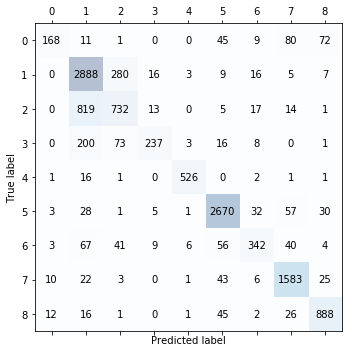

In [24]:
#classification report
print(classification_report(y_test, model.predict(X_test)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Summary

Best model: **RandomForest** w/ param: n_estimator=200

Accuracy of test set: **81.1%**